# Random Forest

The random forest model performed the best among all the baseline models, and has significant tuning that can be done, so I'm hopeful that this one will perform well.

In [1]:
import pandas as pd
from scripts import get_metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('../data/cleaned_data.csv', index_col='id')
df

,status_group,longitude,latitude,population,construction_year,funder_communal standpipe,funder_communal standpipe multiple,funder_hand pump,funder_improved spring,funder_other,...,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
id,,,,,,,,,,,,,,,,,,,,,
69572,functional,0.496455,0.168353,0.003541,0.735849,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8776,functional,0.474167,0.892122,0.009148,0.943396,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34310,functional,0.731374,0.734967,0.008164,0.924528,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
67743,non functional,0.826875,0.046394,0.001869,0.490566,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19728,functional,0.141899,0.922364,0.013692,0.852830,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,functional,0.704287,0.788246,0.004066,0.735849,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
27263,functional,0.525501,0.242120,0.001803,0.679245,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
37057,functional,0.410685,0.272182,0.003836,0.924528,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
y = df['status_group']
X = df.drop(['status_group'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=212)

## Baseline Model

In [4]:
baseline = RandomForestClassifier()
baseline.fit(X_train, y_train)
get_metrics(y_test, X_test, baseline)

{'accuracy': 0.7952861952861953,
 'f1': 0.7888460477820153,
 'precision': 0.7866511636737485,
 'recall': 0.7952861952861953}

## GridSearch CV

The hyperparameters I found seem like they might have a significant impact on the results. Raising n_estimators too high increased the runtime significantly, so I didn't want to go any higher than 500.

In [2]:
from sklearn.model_selection import GridSearchCV

In [6]:
param_grid = {
    'n_estimators': [10, 100, 500], # default 100
    'max_depth': [None, 10], # default None
    'max_features': ['auto', 50, None] # default 'auto': auto=sqrt(# of features)=10, None=# of features=100
}
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10],
                         'max_features': ['auto', 50, None],
                         'n_estimators': [10, 100, 500]},
             scoring='accuracy')

In [7]:
grid_search.best_params_

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 500}

In [8]:
forest_tuned = RandomForestClassifier(n_estimators=500, max_depth=None, max_features='auto')
forest_tuned.fit(X_train, y_train)
get_metrics(y_test, X_test, forest_tuned)

{'accuracy': 0.7934680134680134,
 'f1': 0.7870670131720358,
 'precision': 0.7848284765539788,
 'recall': 0.7934680134680134}

In [7]:
param_grid = {
    'n_estimators': [500], # default 100
    'max_depth': [None, 50], # default None
    'max_features': [5, 'auto', 15] # default 'auto': auto=sqrt(# of features)=10, None=# of features=100
}
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 50],
                         'max_features': [5, 'auto', 15],
                         'n_estimators': [500]},
             scoring='accuracy')

In [8]:
grid_search.best_params_

{'max_depth': None, 'max_features': 15, 'n_estimators': 500}

In [9]:
forest_tuned = RandomForestClassifier(n_estimators=500, max_depth=None, max_features=15)
forest_tuned.fit(X_train, y_train)
get_metrics(y_test, X_test, forest_tuned)

{'accuracy': 0.7952861952861953,
 'f1': 0.7887222537260427,
 'precision': 0.7866326451468552,
 'recall': 0.7952861952861953}

## Bagging

Bagging this model saw pretty good improvement: 0.5%. Random forests is already similar to bagged forests, so I didn't expect bagging to improve performance this much. But since it worked, I will use it in the final model.

In [4]:
from sklearn.ensemble import BaggingClassifier

In [5]:
forest_bagged = BaggingClassifier(RandomForestClassifier(n_estimators=500, max_depth=None, max_features=15))  
forest_bagged.fit(X_train, y_train)
get_metrics(y_test, X_test, forest_bagged)

{'accuracy': 0.8018855218855219,
 'f1': 0.7930922693527286,
 'precision': 0.7933060737293601,
 'recall': 0.8018855218855219}

## Confusion Matrix

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

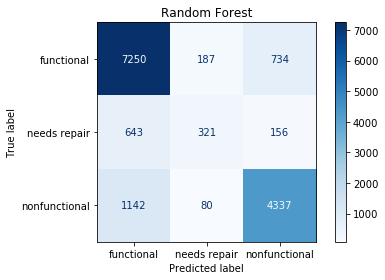

In [7]:
plot_confusion_matrix(forest_bagged, X_test, y_test, display_labels=['functional', 'needs repair', 'nonfunctional'], cmap=plt.cm.Blues)
plt.title('Random Forest')
plt.tight_layout()
plt.savefig('../visualizations/random-forest-confusion-matrix.png')
plt.show()

## Conclusions

The Random Forests model saw some improvement here, but not as much as I had hoped. The helpful hyperparameters also raised the runtime of the model, forcing me to stop improving the hyperparameters. That said, it is outperforming my other models, and was responsive to bagging, making it the most useful to far.